## https://www.kaggle.com/competitions/nlp-getting-started/overview

In [52]:
import pandas as pd
import numpy as np
import keras
import keras_nlp
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px

In [53]:
df_train      = pd.read_csv('/content/sample_data/train.csv')
df_test       = pd.read_csv('/content/sample_data/test.csv')
df_submission = pd.read_csv('/content/sample_data/sample_submission.csv')

In [54]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [55]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [56]:
def show_null_data(data):
    null_count = data.isna().sum()
    null_percent = data.isna().sum() / len(data)
    null_percent = null_percent.apply(lambda x: f"{x:.1%}")
    print("Duplicated Total Count: ", data.duplicated().sum())
    result = pd.concat([null_count, null_percent], axis=1)
    result.columns = ['Null Count', 'Null Percentage']
    return result

print("DataFrame name: df_train")
show_null_data(df_train)

DataFrame name: df_train
Duplicated Total Count:  0


,Null Count,Null Percentage
id,0,0.0%
keyword,61,0.8%
location,2533,33.3%
text,0,0.0%
target,0,0.0%


In [57]:
print("DataFrame name: df_test")
show_null_data(df_test)

DataFrame name: df_test
Duplicated Total Count:  0


,Null Count,Null Percentage
id,0,0.0%
keyword,26,0.8%
location,1105,33.9%
text,0,0.0%


In [58]:
df_train['len_text'] = df_train['text'].apply(len)
df_test['len_text'] = df_test['text'].apply(len)

In [59]:
df_train['len_text']

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: len_text, Length: 7613, dtype: int64

In [60]:
df_test['len_text']

0        34
1        64
2        96
3        40
4        45
       ... 
3258     55
3259    139
3260     55
3261     65
3262     68
Name: len_text, Length: 3263, dtype: int64

In [61]:
fig = px.histogram(df_train, x='len_text', color='len_text', template='plotly_dark')
fig.show()

In [62]:
fig = px.pie(df_train, names='target', hole=0.3, template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+value', title='Distribution of target values')
fig.show()

In [63]:
learning_rate = 1e-5
batch_size = 16
epoch      = 1
max_seq_length = 128
AUTO = tf.data.experimental.AUTOTUNE

In [64]:
df_train['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [65]:
from sklearn.model_selection import train_test_split

X = df_train['text']
y = df_train['target']
X_test = df_test['text']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=54, shuffle=True)

In [66]:
preset = "distil_bert_base_en_uncased"
preset2 = 'distilbert-base-uncased-finetuned-sst-2-english'
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(preset, sequence_length = max_seq_length, name = "preprocessor_4_tweets")
classifier = keras_nlp.models.DistilBertClassifier.from_preset(preset, preprocessor = preprocessor, num_classes = 2)
classifier.summary()

/usr/local/lib/python3.10/dist-packages/keras_nlp/src/models/backbone.py:37: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.

/usr/local/lib/python3.10/dist-packages/keras_nlp/src/models/backbone.py:37: UserWarning:

`layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



Preprocessor: "preprocessor_4_tweets"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                  ┃ Output Shape                           ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)                     │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ token_ids (InputLayer)                        │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ distil_bert_backbone (DistilBertBackbone)     │ (None, None, 768)                      │      66,362,880 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ tf.__operators__.getitem_3 (SlicingOpLambda)  │ (None, 768)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ pooled_dense (Dense)                          │ (None, 768)                            │         590,592 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ classifier_dropout (Dropout)                  │ (None, 768)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ logits (Dense)                                │ (None, 2)                              │           1,538 │
└───────────────────────────────────────────────┴────────────────────────────────────────┴─────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
classifier.summary()

Preprocessor: "preprocessor_4_tweets"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                  ┃ Output Shape                           ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)                     │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ token_ids (InputLayer)                        │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ distil_bert_backbone (DistilBertBackbone)     │ (None, None, 768)                      │      66,362,880 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ tf.__operators__.getitem_3 (SlicingOpLambda)  │ (None, 768)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ pooled_dense (Dense)                          │ (None, 768)                            │         590,592 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ classifier_dropout (Dropout)                  │ (None, 768)                            │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ logits (Dense)                                │ (None, 2)                              │           1,538 │
└───────────────────────────────────────────────┴────────────────────────────────────────┴─────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
classifier.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                         metrics=['accuracy'])
history = classifier.fit(x = X_train,
                               y = y_train,
                               batch_size = batch_size,
                               epochs = epoch,
                               validation_data=(X_val, y_val))

357/357 [==============================] - 108s 250ms/step - loss: 0.4548 - accuracy: 0.8108 - val_loss: 0.4411 - val_accuracy: 0.8204


In [69]:
def plot_history(history):

    losses = history.history['loss']
    val_losses = history.history['val_loss']


    accuracies = history.history['accuracy']
    val_accuracies = history.history['val_accuracy']


    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    axes[0].plot(losses, label='Train Loss', color='orange')
    axes[0].plot(val_losses, label='Validation Loss', color='cyan')
    axes[0].legend()
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training and Validation Loss')


    axes[1].plot(accuracies, label='Train Accuracy', color='orange')
    axes[1].plot(val_accuracies, label='Validation Accuracy', color='cyan')
    axes[1].legend()
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Training and Validation Accuracy')


    plt.tight_layout()
    plt.show()

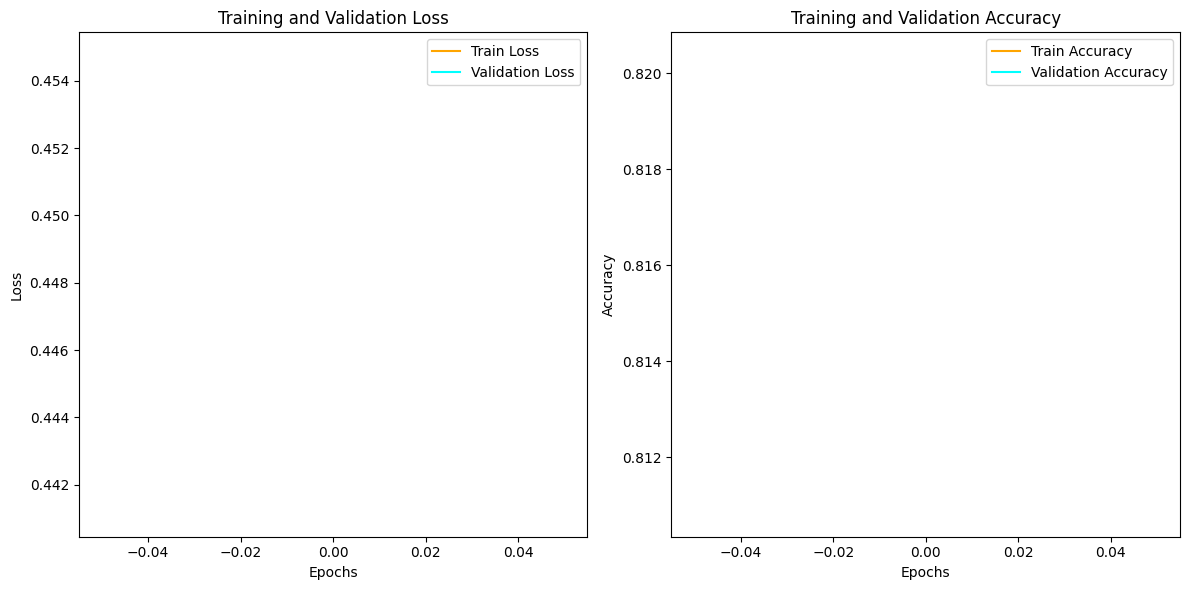

In [70]:
plot_history(history)

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [72]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
    y_true,
    np.argmax(y_pred, axis = 1),
    display_labels = ["Not Disaster", "Disaster"],
    cmap = plt.cm.Blues
    )

    tn,fp,fn,tp = confusion_matrix(y_true, np.argmax(y_pred, axis = 1)).ravel()
    f1_score = tp/(tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on" + dataset + "Dataset -- F1 Score: " +str(f1_score.round(2)))

179/179 [==============================] - 29s 156ms/step


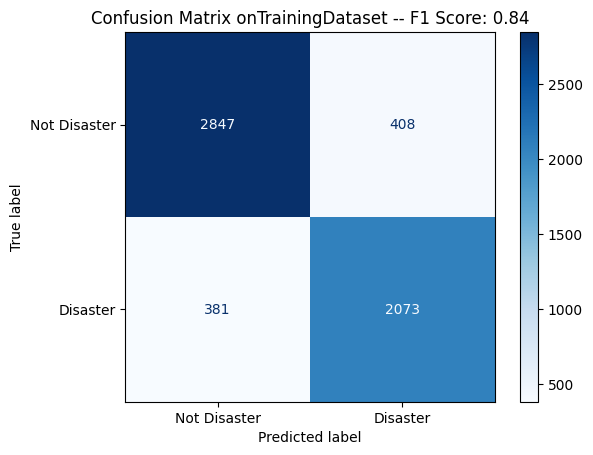

In [73]:
y_pred = classifier.predict(X_train)
displayConfusionMatrix(y_train, y_pred, "Training")


60/60 [==============================] - 10s 152ms/step


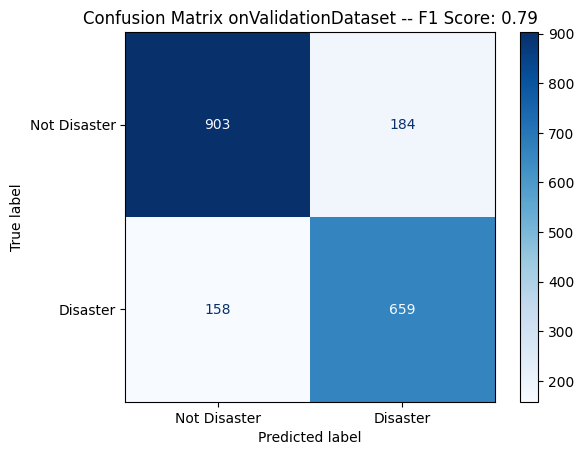

In [74]:
y_pred_val = classifier.predict(X_val)
displayConfusionMatrix(y_val, y_pred_val, "Validation")